In [51]:
############system libraries##################
from __future__ import print_function

import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import cv2
import warnings
from tqdm import tqdm
from PIL import Image

#############sklearn and image library#################
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#############keras library#################
import keras
import tensorflow as tf
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import RMSprop, SGD,  Adagrad, Adadelta, Adam, Adamax
from keras.layers.normalization import BatchNormalization
from keras.utils import plot_model
from keras.models import load_model
from keras.preprocessing import image
from keras import *
from keras.models import Model
from tensorflow import keras as tk
warnings.filterwarnings("ignore")
np.random.seed(123)


In [52]:
###version check###########
print(keras.__version__)
print(tf.__version__)

2.2.0
1.8.0


In [53]:
#################### data and parameters setup####################
batch_size = 128
img_rows, img_cols = 128, 128
epoch=10

################# ImageDataGenerator########################
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# subfolers of 'data/train'
train_generator = train_datagen.flow_from_directory(
        'data/train',  
        target_size=(img_rows, img_cols), 
        color_mode="rgb",
        batch_size=batch_size,
        class_mode='categorical')  

# subfolers of 'data/test or val'
validation_generator = test_datagen.flow_from_directory(
        'data/test',
        target_size=(img_rows, img_cols),
        color_mode="rgb",
        batch_size=batch_size,
        class_mode='categorical')

###################plot Data###################


Found 172 images belonging to 5 classes.
Found 172 images belonging to 5 classes.


apples


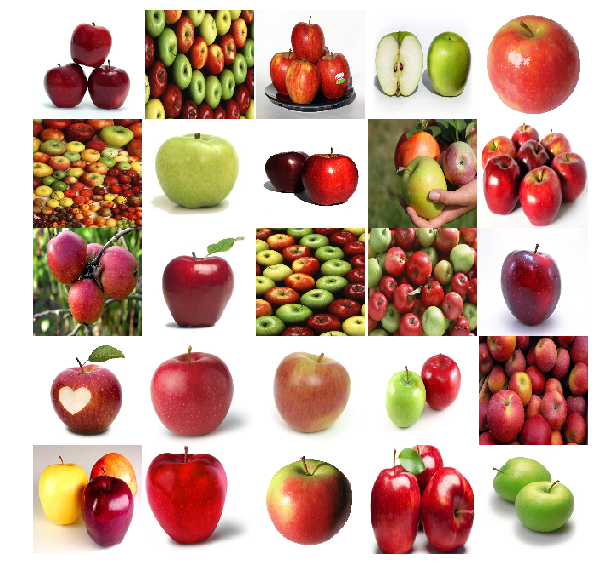

lemons


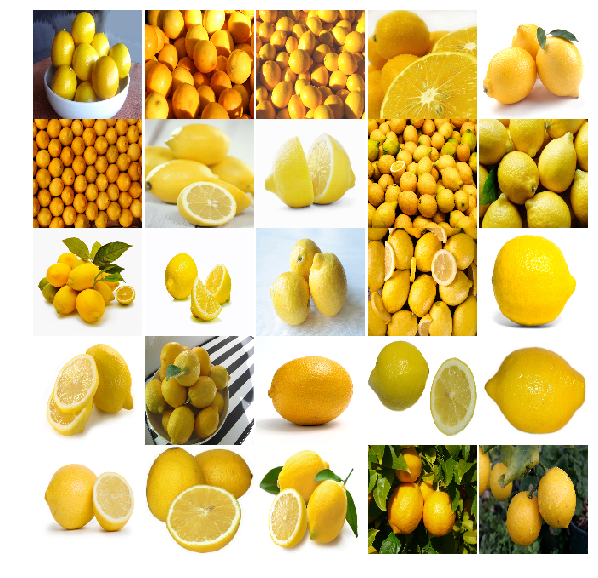

pears


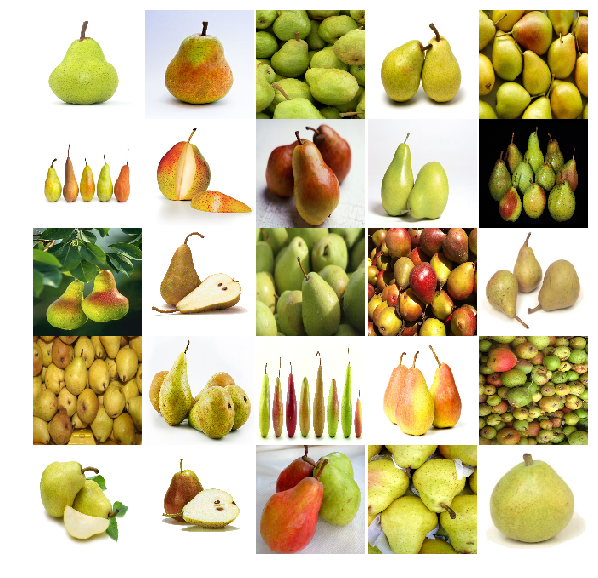

plums


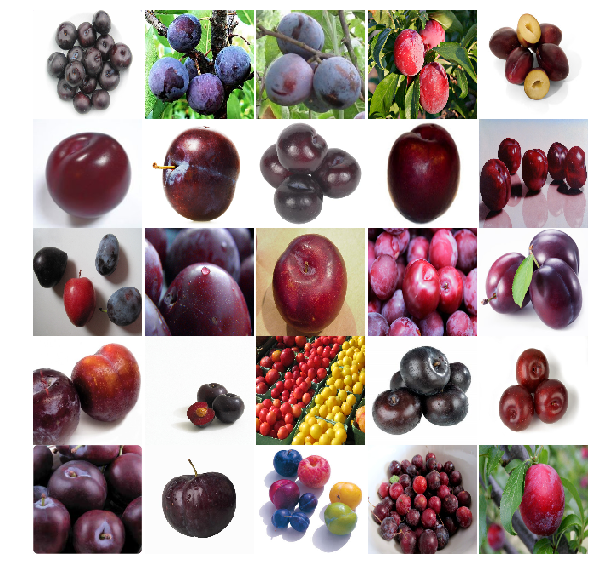

tomatoes


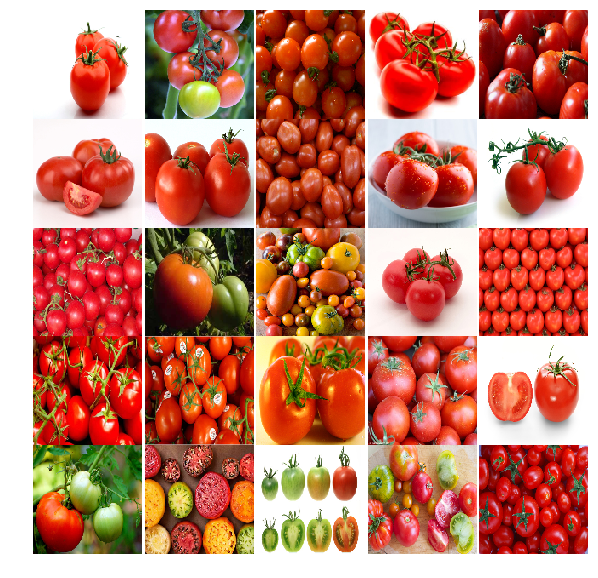

In [54]:
-

In [55]:
########## session beging##########
sess = tf.Session()
K.set_session(sess)

In [56]:
########## deep model ##########

input_img= tf.keras.Input(shape=(img_rows, img_cols, 3))

in_x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same')(in_x)

x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same')(x)

x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same')(x)

x = tf.keras.layers.Conv2D(64, (3, 3),activation='relu', padding='same')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same')(x)

x = tf.keras.layers.Conv2D(64,(3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),padding='same')(x)

x = tf.keras.layers.Flatten()(x)  
x = tf.keras.layers.Dense(128, activation='relu' )(x)
x = tf.keras.layers.Dense(5,activation='softmax')(x)


In [57]:
########## compile and model summary ##########

model= tf.keras.Model(input_img, x)
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
dropout_10 (Dropout)         (None, 32, 32, 64)        0         
__________

In [58]:
########## train session beging##########

hist = model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=epoch,
        verbose=1,
        use_multiprocessing=True,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)

model.save_weights('first_try.h5') 
plot_model(model, to_file='model.png')
print (K.learning_phase())

Epoch 1/10
15/15 [==============================] - 75s 5s/step - loss: 1.4587 - acc: 0.3700 - val_loss: 1.4499 - val_acc: 0.5233
Epoch 2/10
15/15 [==============================] - 68s 5s/step - loss: 0.8864 - acc: 0.6443 - val_loss: 1.1284 - val_acc: 0.7093
Epoch 3/10
15/15 [==============================] - 68s 5s/step - loss: 0.5200 - acc: 0.7817 - val_loss: 0.8907 - val_acc: 0.8314
Epoch 4/10
15/15 [==============================] - 63s 4s/step - loss: 0.5090 - acc: 0.7772 - val_loss: 0.9081 - val_acc: 0.8430
Epoch 5/10
15/15 [==============================] - 69s 5s/step - loss: 0.4238 - acc: 0.8282 - val_loss: 0.8785 - val_acc: 0.8488
Epoch 6/10
15/15 [==============================] - 66s 4s/step - loss: 0.2705 - acc: 0.8958 - val_loss: 0.7021 - val_acc: 0.8547
Epoch 7/10
15/15 [==============================] - 66s 4s/step - loss: 0.2951 - acc: 0.8885 - val_loss: 0.7090 - val_acc: 0.9128
Epoch 8/10
15/15 [==============================] - 63s 4s/step - loss: 0.1825 - acc: 0.93

In [59]:
#######################prediction#########################
test_generator = test_datagen.flow_from_directory(
        'data/test',
        target_size=(img_rows, img_cols),
        color_mode="rgb",
        shuffle = False,
        class_mode='categorical',
        batch_size=1)

filenames = test_generator.filenames
ground_truth = test_generator.classes
label2index = test_generator.class_indices
 

Found 172 images belonging to 5 classes.


In [60]:
# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())

nb_samples = len(filenames)
predict = model.predict_generator(test_generator,
                                  steps = nb_samples)
predicted_classes = np.argmax(predict,axis=1)
errors = np.where(predicted_classes != ground_truth)[0]

print("No of errors = {}/{}".format(len(errors),
      test_generator.samples))


No of errors = 11/172


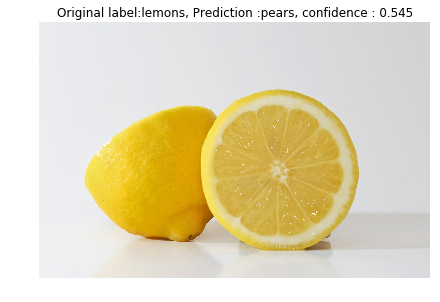

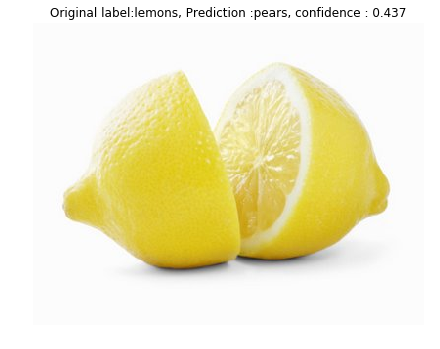

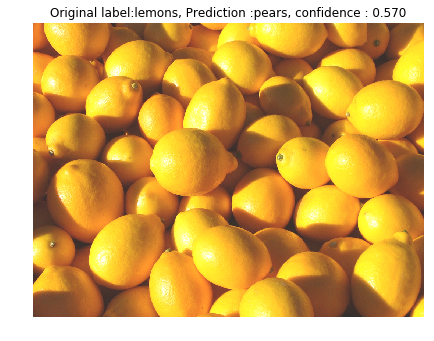

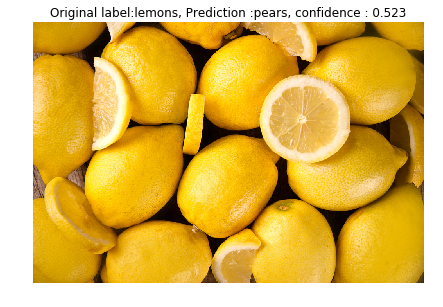

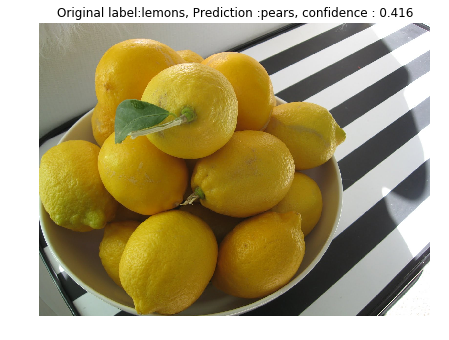

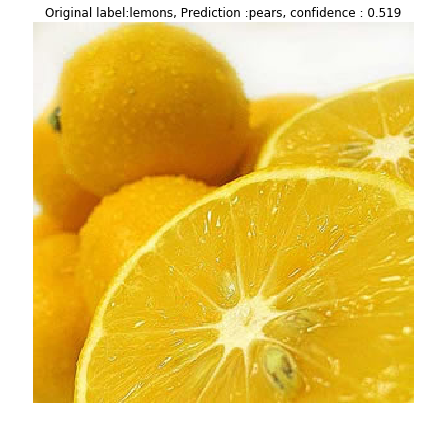

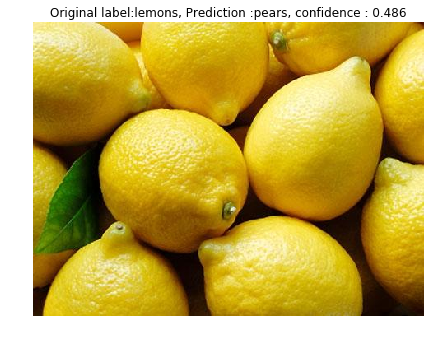

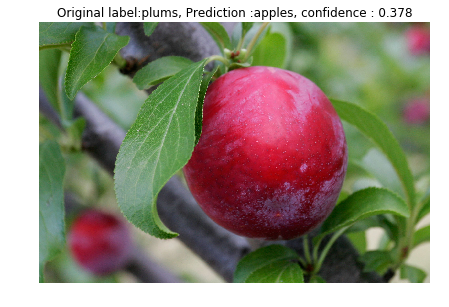

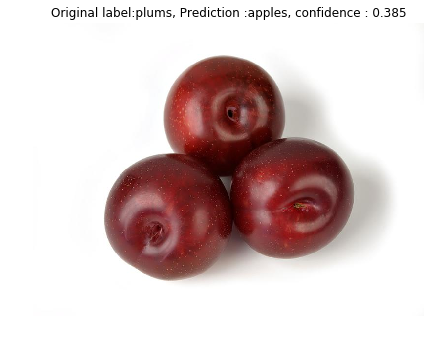

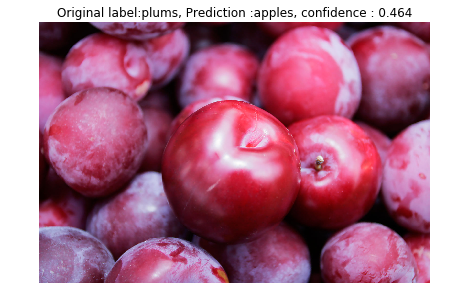

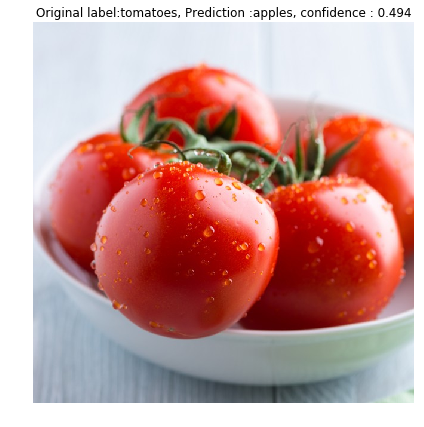

Confusion Matrix
[[35  0  0  0  0]
 [ 0 21  7  0  0]
 [ 0  0 32  0  0]
 [ 3  0  0 28  0]
 [ 1  0  0  0 45]]
Classification Report
             precision    recall  f1-score   support

     Appels       0.90      1.00      0.95        35
     Lemons       1.00      0.75      0.86        28
   Tomatoes       0.82      1.00      0.90        32
      Plums       1.00      0.90      0.95        31
      Pears       1.00      0.98      0.99        46

avg / total       0.95      0.94      0.94       172



In [61]:
# Show the errors with predicte results
for i in range(len(errors)):
    pred_class = np.argmax(predict[errors[i]])
    pred_label = idx2label[pred_class]
     
    title = 'Original label:{}, Prediction :{}, confidence : {:.3f}'.format(
        filenames[errors[i]].split('/')[0],
        pred_label,
        predict[errors[i]][pred_class])
     
    original = load_img('{}/{}'.format('data/test',filenames[errors[i]]))
    plt.figure(figsize=[7,7])
    plt.axis('off')
    plt.title(title)
    plt.imshow(original)
    plt.show()

y_pred = np.argmax(predict, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')

target_names = ['Appels', 'Lemons', 'Tomatoes',
                'Plums', 'Pears']
print(classification_report(test_generator.classes,
                            y_pred, target_names=target_names))


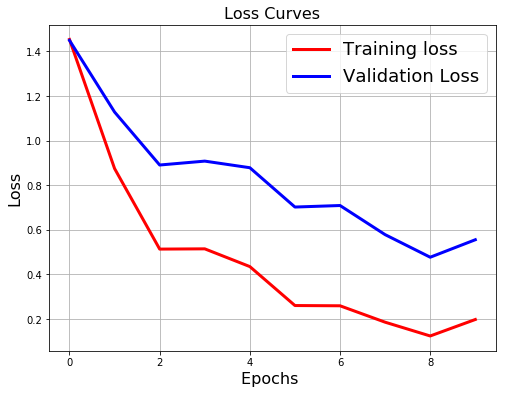

In [62]:
#######################Accuracy and loss plots##################
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(hist.history['loss'],'r',linewidth=3.0)
plt.plot(hist.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.grid('True')
plt.show()



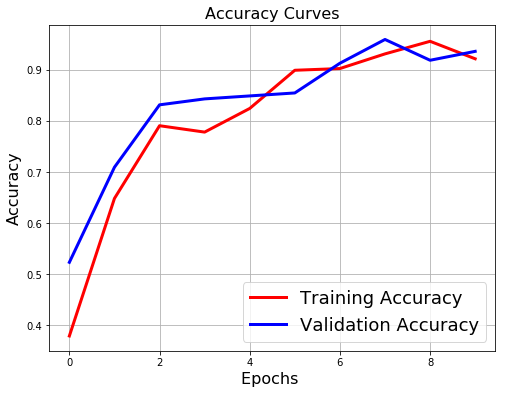

In [63]:
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(hist.history['acc'],'r',linewidth=3.0)
plt.plot(hist.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.grid('True')
plt.show()

In [64]:
sess.close()